# Basic Waveguide EME

This tutorial utilizes EMEPy's new feature, the profile monitor, to visualize the field profile in a single mode waveguide as it propagates.

Start by importing the necessary classes and defining the waveguide parameters.

In [1]:
from emepy.eme import EME, Layer
from emepy.monitors import Monitor
from emepy.ann import ANN, MSNeuralNetwork
import numpy as np
from matplotlib import pyplot as plt

wavelength = 1.55
width = 0.5
thickness = 0.22
num_modes = 1
length = wavelength

### Setup waveguide and EME

In [2]:
eme = EME()
ann = ANN()

mode_solvers = [
    MSNeuralNetwork(
        ann,
        wavelength * 1e-6,
        width * 1e-6,
        thickness * 1e-6,
    )  for i in range(5)
]

for i in range(5):
    eme.add_layer(Layer(mode_solvers[i], num_modes, wavelength * 1e-6, length * 1e-6))

/Users/ianhammond/miniconda3/envs/testeme/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Setup monitor and Propagate

We setup two monitors: one in the xz plane and one in the yz plane. Both will store all the field and index profiles for us.

In [3]:
monitor_xz = eme.add_monitor(axes="xz")
monitor_yz = eme.add_monitor(axes="yz")
eme.propagate() 

100%|██████████| 3/3 [00:09<00:00,  3.13s/it]


### Propagate and Visualize

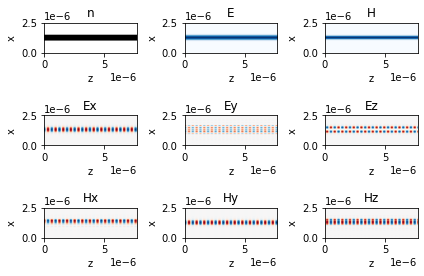

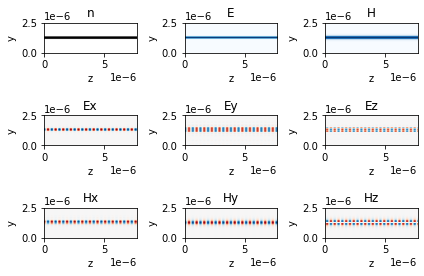

In [4]:
components = ['n','E','H','Ex','Ey','Ez','Hx','Hy','Hz']
fig, axs = plt.subplots(3,3)
for row in range(3):
    for col in range(3):
        monitor_xz.visualize(axs[row,col], components[row*3+col])
fig.tight_layout()
plt.show()

components = ['n','E','H','Ex','Ey','Ez','Hx','Hy','Hz']
fig, axs = plt.subplots(3,3)
for row in range(3):
    for col in range(3):
        monitor_yz.visualize(axs[row,col], components[row*3+col])
fig.tight_layout()
plt.show()